In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.cm as cmx
import matplotlib.colors as colors
from adjustText import adjust_text

### load preprocessed word frequencies
On a per cluster basis we collected issue comments for projects, preprocessed them and created dictionaries with word frequencies in a separate script.


In [2]:
sorted_word_dicts = pickle.load(open("data/sorted_wordfrequencies.p", "rb"))
freq_dicts = pickle.load(open("data/freq_dicts.p", "rb"))

Function to calcualte log-odds ratio

In [3]:
totalwords=[0,0,0,0,0]
for i,dic in enumerate(sorted_word_dicts):
    for word in dic:
        totalwords[i]+=word[1]


def odds(token, cluster):
    """calculates logarithmic odds ratio for a token in a cluster relative to all other clusters.
    """
    tokfreq=freq_dicts[cluster][token]
    reltok = tokfreq/totalwords[cluster]
    freqothers=0
    normothers=0
    for i in range(5):
        if i!=cluster:
            try:
                freqothers+=freq_dicts[i][token]
                normothers+=totalwords[i]
            except:
                return False
    if normothers!=0:
        relothers=freqothers/normothers
    else:
        relothers=0.0001
        
    if relothers == 0:
        relothers = 0.0001
    return (np.log(reltok/(1-reltok)/(relothers/(1-relothers))), tokfreq/totalwords[cluster])
    
            
# helper function for the color map 
def helper_cmap(x):
    if x >1:
        return 100
    elif x < -1:
        return 0
    else:
        return (x + 1)/2 * 100
           
#define color map    
cNorm  = colors.Normalize(vmin=0, vmax=100)
jet = cm = plt.get_cmap('coolwarm') 
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet) 

### Plot log odd ratios for each cluster
We plot the log odds ratios of the 500 most frequent words adjusted for stop words.

Cluster:  1


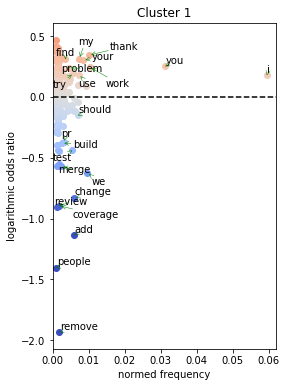

Cluster:  2


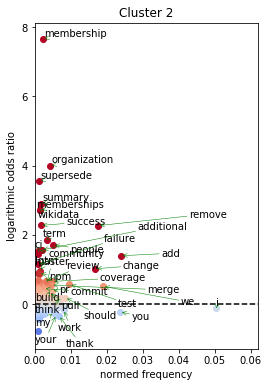

Cluster:  3


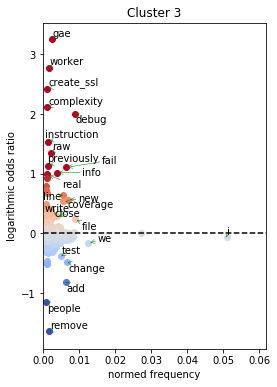

Cluster:  4


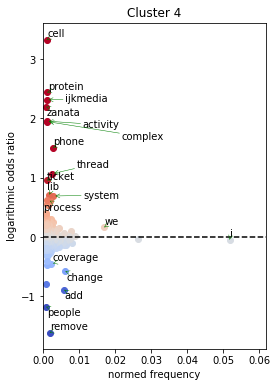

Cluster:  5


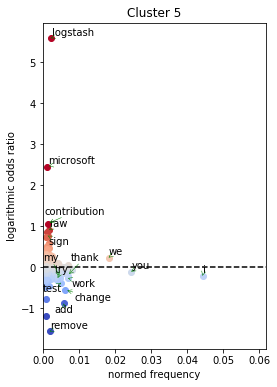

In [4]:
for i in range(5):
    print("Cluster: ", i+1)
    fig, ax = plt.subplots(figsize=(4,6))
    #ax.set_ylim([0,10])
    texts = []
    for token in sorted_word_dicts[i][:500]:
        try:
            res = odds(token[0], i)
            if res != False:
                if res[1]> 0.0008:
                    ax.scatter(res[1], res[0], c=np.array([scalarMap.to_rgba(helper_cmap(res[0]))]))
                    if res[0]*res[1] > 0.001 or res[0]*res[1]<-0.001:
                        texts.append(plt.text(res[1], res[0], token[0], ha='center', va='center'))
        except:
            pass
    
    plt.xlabel("normed frequency")
    plt.ylabel("logarithmic odds ratio")
    ax.set_title("Cluster " + str(i+1))
    plt.axhline(0, color='black', linestyle="--")
    ax.set_xlim([0,0.062])
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green', lw=0.5))
    plt.show()